TP 2 IA: Clasificación de pistachos

In [129]:
#!pip3 install opencv-python
#!pip3 install tensorflow

In [148]:
import cv2
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [131]:
x = [] # images as data
y = [] # 1 or 0 according to the x[i] pistacho type

In [132]:
class_label_encoding = {
    'Kirmizi_Pistachio': 0,
    'Siirt_Pistachio': 1
}

In [133]:
# https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html
full_dir = r"C:\Users\Rakki\Desktop\IA\Pistachio_Image_Dataset\Pistachio_Image_Dataset\Pistachio_Image_Dataset"

for directory in os.listdir(full_dir):
    if('.txt' in directory): continue
    for file in os.listdir(full_dir+'/'+directory):
        image_path = full_dir+'/'+directory+'/'+file
        img = cv2.imread(image_path,0).astype('float32') # convert images as grayscale
        img = cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)
        img/=255. # This is to have all point in a scale from 0 to 1. because RGB values varies from 0 to 255
        x.append(img)        
        y.append(class_label_encoding[directory]) # Set 1 or 0 for each pistacho type, based on directory folder
        
img[150] # example pistacho

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00653595, 0.00653595, 0.11154684,
       0.60871464, 0.8117647 , 0.8627451 , 0.8662309 , 0.8610022 ,
       0.8135076 , 0.77124184, 0.7176471 , 0.6244009 , 0.51372

In [136]:
img.shape

(200, 200)

In [137]:
x = np.array(x)
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
x.shape

(2148, 200, 200, 1)

In [138]:
y = np.array(y)

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1234)
len(y_train)

1503

In [140]:
# y_train.sum() gives all the Siirt_Pistachio since they were labeled with a 1

print('Train set')
print('class 0:', len(y_train) - y_train.sum()) 
print('class 1:', y_train.sum())

print()

print('Test set')
print('class 0:', len(y_test) - y_test.sum())
print('class 1:', y_test.sum())

Train set
class 0: 859
class 1: 644

Test set
class 0: 373
class 1: 272


In [124]:
model = Sequential()

## CHEQUEAR POR QUE AGREGA ESTO
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# https://keras.io/api/layers/convolution_layers/convolution2d/
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,1)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())


model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,'sigmoid'))

model.compile('Adam','binary_crossentropy',['accuracy'])

print(model.summary())

len(x_train)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 198, 198, 32)      320       
                                                                 
 conv2d_32 (Conv2D)          (None, 196, 196, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 98, 98, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 96, 96, 64)        36928     
                                                                 
 conv2d_34 (Conv2D)          (None, 94, 94, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 47, 47, 128)      0         
 g2D)                                                

1503

In [161]:

history = model.fit(np.array(x_train), np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)), batch_size=128, epochs=5)

Epoch 1/5
12/12 [==============================] - 112s 9s/step - loss: 0.1473 - accuracy: 0.9401 - val_loss: 0.3798 - val_accuracy: 0.8434
Epoch 2/5
12/12 [==============================] - 114s 10s/step - loss: 0.1676 - accuracy: 0.9375 - val_loss: 0.3972 - val_accuracy: 0.8698
Epoch 3/5
12/12 [==============================] - 116s 10s/step - loss: 0.1528 - accuracy: 0.9388 - val_loss: 0.4200 - val_accuracy: 0.8574
Epoch 4/5
12/12 [==============================] - 118s 10s/step - loss: 0.1567 - accuracy: 0.9268 - val_loss: 0.4065 - val_accuracy: 0.8620
Epoch 5/5
12/12 [==============================] - 113s 9s/step - loss: 0.1341 - accuracy: 0.9368 - val_loss: 0.4957 - val_accuracy: 0.8419


Analsis de resultados

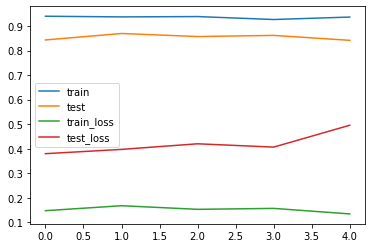

In [162]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()

In [163]:
loss, acc = model.evaluate(np.array(x_test), np.array(y_test), verbose=0) 
print('Testing accuracy:', round(acc*100,3))
print('Testing loss:', round(loss,3))

Testing accuracy: 84.186
Testing loss: 0.496
